# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-формата-даты-в-&quot;Дате-публикации&quot;" data-toc-modified-id="Изменение-формата-даты-в-&quot;Дате-публикации&quot;-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение формата даты в "Дате публикации"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-и-исправляем-аномальные-значения-&quot;высота-потолка&quot;" data-toc-modified-id="Избавляемся-от-пропусков-и-исправляем-аномальные-значения-&quot;высота-потолка&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Избавляемся от пропусков и исправляем аномальные значения "высота потолка"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Расстояние-от-центра&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Расстояние-от-центра&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Избавляемся от пропусков "Расстояние от центра"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Расстояние-от-аэропорта&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Расстояние-от-аэропорта&quot;-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Избавляемся от пропусков "Расстояние от аэропорта"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Всего-этажей-в-доме&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Всего-этажей-в-доме&quot;-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Избавляемся от пропусков "Всего этажей в доме"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Жилая-площадь&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Жилая-площадь&quot;-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Избавляемся от пропусков "Жилая площадь"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Площадь-кухни&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Площадь-кухни&quot;-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Избавляемся от пропусков "Площадь кухни"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Аппартаменты&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Аппартаменты&quot;-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Избавляемся от пропусков "Аппартаменты"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Наличие-балкона&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Наличие-балкона&quot;-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Избавляемся от пропусков "Наличие балкона"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Название-населенного-пункта&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Название-населенного-пункта&quot;-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Избавляемся от пропусков "Название населенного пункта"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-в-&quot;Количестве-парков&quot;-и-&quot;Расстоянии-до-ближайшего-парка&quot;" data-toc-modified-id="Избавляемся-от-пропусков-в-&quot;Количестве-парков&quot;-и-&quot;Расстоянии-до-ближайшего-парка&quot;-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>Избавляемся от пропусков в "Количестве парков" и "Расстоянии до ближайшего парка"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-в-&quot;Количестве-водоемов&quot;-и-&quot;Расстоянии-до-ближайшего-водоема&quot;" data-toc-modified-id="Избавляемся-от-пропусков-в-&quot;Количестве-водоемов&quot;-и-&quot;Расстоянии-до-ближайшего-водоема&quot;-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>Избавляемся от пропусков в "Количестве водоемов" и "Расстоянии до ближайшего водоема"</a></span></li><li><span><a href="#Избавляемся-от-пропусков-&quot;Сколько-дней-размещено-объявление&quot;" data-toc-modified-id="Избавляемся-от-пропусков-&quot;Сколько-дней-размещено-объявление&quot;-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>Избавляемся от пропусков "Сколько дней размещено объявление"</a></span></li><li><span><a href="#Изменение-типов-данных-&quot;Всего-этажей&quot;,-&quot;Количество-балконов&quot;,--Количество-парков&quot;,-&quot;Количество-водоемов&quot;,-&quot;Сколько-дней-размещено-объявление&quot;" data-toc-modified-id="Изменение-типов-данных-&quot;Всего-этажей&quot;,-&quot;Количество-балконов&quot;,--Количество-парков&quot;,-&quot;Количество-водоемов&quot;,-&quot;Сколько-дней-размещено-объявление&quot;-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>Изменение типов данных "Всего этажей", "Количество балконов",  Количество парков", "Количество водоемов", "Сколько дней размещено объявление"</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучаем-параметры:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучаем-параметры:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучаем параметры: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучаем-время-продажи-квартиры" data-toc-modified-id="Изучаем-время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучаем время продажи квартиры</a></span></li><li><span><a href="#Убираем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Убираем-редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убираем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Изучаем-какие-факторы-влияют-на-стоимость-квартиры" data-toc-modified-id="Изучаем-какие-факторы-влияют-на-стоимость-квартиры-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучаем какие факторы влияют на стоимость квартиры</a></span></li><li><span><a href="#Изучаем-населенные-пункты" data-toc-modified-id="Изучаем-населенные-пункты-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Изучаем населенные пункты</a></span><ul class="toc-item"><li><span><a href="#Вариант-1" data-toc-modified-id="Вариант-1-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Вариант 1</a></span></li></ul></li><li><span><a href="#Изучаем-квартиры-в-Санкт-Петербурге" data-toc-modified-id="Изучаем-квартиры-в-Санкт-Петербурге-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Изучаем квартиры в Санкт-Петербурге</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


In [3]:
data.describe() # смотрим описание данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


In [4]:
def first_glance (table): # функция для изучения данных info() и value_counts() для каждого столбца
    print(table.info())
    print()
    for i in range(len(table.columns)):
        column = table.columns[i]
        print(table[column].value_counts())
        print()

In [5]:
first_glance(data) # применение функции для ознакомления с данными

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
len(data.query('rooms > 9 and total_area < 100'))

0

Опечатки в кол-ве комнат отсутствуют, так как метраж соответствует кол-ву комнат

In [7]:
len(data.query('floor < 1')) # проверяем наличие нулевого этажа

0

In [8]:
data['locality_name'].unique() # смотрим уникальные значения в названиях населенного пункта

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Вывод

1. пропущенные значения в 14 столбцах.
2. формат даты публикации требует изменения для работы с ней.
3. тип данных floors_total, balcony, parks_around3000, ponds_around3000, days_exposition требуется перевести в тип "int" для удоства подсчета.
4. аномальные значения высоты потолков.

## Предобработка данных

In [9]:
data.isna().mean() # процент пропусков по столбцам

total_images           0.00
last_price             0.00
total_area             0.00
first_day_exposition   0.00
rooms                  0.00
ceiling_height         0.39
floors_total           0.00
living_area            0.08
floor                  0.00
is_apartment           0.88
studio                 0.00
open_plan              0.00
kitchen_area           0.10
balcony                0.49
locality_name          0.00
airports_nearest       0.23
cityCenters_nearest    0.23
parks_around3000       0.23
parks_nearest          0.66
ponds_around3000       0.23
ponds_nearest          0.62
days_exposition        0.13
dtype: float64

### Изменение формата даты в "Дате публикации"

In [10]:
data['correct_first_day_exposition'] = pd.to_datetime(
data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # создаем столбец с корректной датой

In [11]:
data.head(1) # проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_first_day_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan,2019-03-07


### Избавляемся от пропусков и исправляем аномальные значения "высота потолка"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b7ceebd0>]],
      dtype=object)

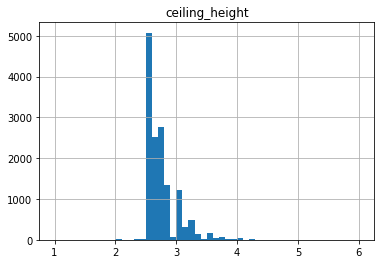

In [12]:
data.hist('ceiling_height', bins=50, range=(1,6))

In [13]:
data['ceiling_height'].value_counts().head()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
Name: ceiling_height, dtype: int64

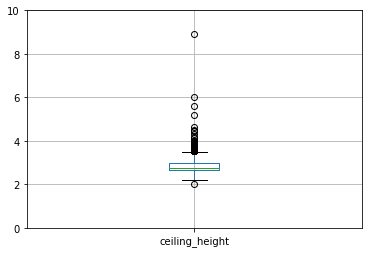

In [14]:
plt.ylim(0,10)
data.pivot_table(index='total_area', values='ceiling_height').boxplot() 

- проверяем разброс высоты потолка
- выше 3,5 м потолки встречаюся крайне редко, но по логике вещей они существуют в природе недвижимости, 
- поэтому будем считать аномальными значениями более 6 метров

In [15]:
data.query('ceiling_height > 6').sort_values(by='ceiling_height') # смотрим на срез

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_first_day_exposition
3474,3,1400000.00,30.00,2018-03-16T00:00:00,1,8.00,5.00,15.30,2,False,...,nan,деревня Нурма,nan,nan,nan,nan,nan,nan,125.00,2018-03-16
17442,0,5350000.00,54.00,2015-06-16T00:00:00,2,8.00,5.00,29.00,2,NaN,...,1.00,Красное Село,24638.00,28062.00,0.00,nan,0.00,nan,469.00,2015-06-16
15743,14,5600000.00,67.00,2016-11-11T00:00:00,3,8.00,16.00,41.00,1,NaN,...,nan,Санкт-Петербург,32691.00,11035.00,1.00,723.00,0.00,nan,474.00,2016-11-11
5863,20,5650000.00,45.00,2018-08-15T00:00:00,1,8.30,16.00,19.30,14,NaN,...,1.00,Санкт-Петербург,13069.00,10763.00,0.00,nan,1.00,613.00,14.00,2018-08-15
22309,20,5300000.00,45.00,2017-09-30T00:00:00,1,10.30,16.00,15.50,15,NaN,...,nan,Санкт-Петербург,36353.00,11936.00,2.00,440.00,2.00,450.00,136.00,2017-09-30
15061,19,5600000.00,56.40,2018-05-11T00:00:00,2,14.00,14.00,32.40,5,NaN,...,2.00,Санкт-Петербург,14814.00,13610.00,0.00,nan,0.00,nan,315.00,2018-05-11
17496,15,6700000.00,92.90,2019-02-19T00:00:00,3,20.00,17.00,53.20,14,NaN,...,5.00,Санкт-Петербург,16295.00,15092.00,1.00,967.00,0.00,nan,nan,2019-02-19
20507,12,5950000.00,60.00,2018-02-19T00:00:00,2,22.60,14.00,35.00,11,NaN,...,1.00,Санкт-Петербург,27028.00,12570.00,0.00,nan,0.00,nan,40.00,2018-02-19
5076,0,3850000.00,30.50,2018-10-03T00:00:00,1,24.00,5.00,19.50,1,True,...,nan,Санкт-Петербург,29686.00,8389.00,3.00,397.00,1.00,578.00,7.00,2018-10-03
355,17,3600000.00,55.20,2018-07-12T00:00:00,2,25.00,5.00,32.00,2,False,...,2.00,Гатчина,nan,nan,nan,nan,nan,nan,259.00,2018-07-12


In [16]:
len(data.query('ceiling_height > 6')) # количество позиций с потолком более 6 метров

29

In [17]:
data['ceiling_height'].median()

2.65

In [18]:
len(data.query('ceiling_height == 27')) # кол-во значение 27 метров встречается довольно часто

8

In [19]:
data.loc[data['ceiling_height'] == 27.00, 'ceiling_height'] = 2.70 

# 2.70 является стандартом, поэтому подразумеваем опечатку и меняем на 2,7 метра

In [20]:
len(data.query('ceiling_height == 25')) # кол-во значение 25 метров встречается довольно часто

7

In [21]:
data.loc[data['ceiling_height'] == 25.00, 'ceiling_height'] = 2.50 

# 2.50 является стандартом, поэтому подразумеваем опечатку и меняем на 2,5 метра

In [22]:
data[(data['ceiling_height'] == 25.00) | (data['ceiling_height'] == 27.00)] # смотрим на срез

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_first_day_exposition


In [23]:
data['ceiling_height'].isna().sum() # количество пропусков

9195

In [24]:
data['ceiling_height'].isna().mean() # пропуски составляют почти 40%

0.38799105447487237

In [25]:
data.corr().head()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.00,0.10,0.12,0.10,0.01,0.01,0.10,0.03,-0.03,-0.02,0.10,0.12,-0.00,-0.05,0.02,-0.01,-0.01,-0.00,-0.03
last_price,0.10,1.00,0.65,0.36,0.11,-0.01,0.57,0.03,-0.03,-0.01,0.52,0.03,-0.03,-0.21,0.15,-0.02,0.16,-0.08,0.08
total_area,0.12,0.65,1.00,0.76,0.13,-0.08,0.94,-0.02,-0.07,-0.03,0.61,0.05,-0.03,-0.23,0.16,-0.02,0.16,-0.10,0.15
rooms,0.10,0.36,0.76,1.00,0.07,-0.23,0.85,-0.15,-0.15,-0.09,0.27,0.02,-0.06,-0.18,0.14,-0.05,0.09,-0.06,0.13
ceiling_height,0.01,0.11,0.13,0.07,1.00,-0.03,0.12,-0.01,0.00,0.00,0.11,0.04,-0.03,-0.11,0.08,-0.02,0.08,-0.05,0.03


Предполагаем, что высота потолков взаимосвязана с общей площадью объекта. Поэтому общую площадь разобьем на категории на основании квартилей.

In [26]:
def area_category(meters): # функция по категоризации общей площади на основании квартилей
    if meters <= 40:
        return 'маленькая'
    elif 40 < meters <= 52:
        return 'средняя'
    elif 52 < meters <= 69.90:
        return 'большая'
    else:
        return 'очень большая'

In [27]:
data['category_total_area'] = data['total_area'].apply(area_category) 

# применяем функцию к столбцу с общей площадью и создаем новый столбец

In [28]:
data['category_total_area'].value_counts() # смотрим на кол-во строк с категорией

маленькая        6042
очень большая    5921
средняя          5913
большая          5823
Name: category_total_area, dtype: int64

In [29]:
median_ceiling_height = data.groupby('category_total_area')['ceiling_height'].median()
median_ceiling_height

# вычисляем медиану для каждой категории

category_total_area
большая         2.60
маленькая       2.60
очень большая   2.80
средняя         2.60
Name: ceiling_height, dtype: float64

In [30]:
data.loc[
    (
        ((data['ceiling_height'].isna()) | (data['ceiling_height'] > 6.00)) & 
         (data['category_total_area'] == 'маленькая') | 
         (data['category_total_area'] == 'средняя') | 
         (data['category_total_area'] == 'большая') 
         ), 'ceiling_height'
        ] = median_ceiling_height[0] # заполняем пропуски или меняем значения более 6 метров высоты потолка значением медианы для категории

In [31]:
data.loc[
    (
        (data['ceiling_height'].isna()) | (data['ceiling_height'] > 6.00) &
        (data['category_total_area'] == 'очень большая')
    ), 'ceiling_height'
] = median_ceiling_height[2] # заполняем пропуски или меняем значения более 6 метров высоты потолка значением медианы для категории 'очень большая'

In [32]:
len(data.query('ceiling_height.isna() or ceiling_height > 6.00')) # проверяем изменения

0

### Избавляемся от пропусков "Расстояние от центра"

In [33]:
len(data.query('cityCenters_nearest.isna()')) # считаем количество пропусков в столбце

5519

In [34]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0) 

# заменяем пропуски медианой

In [35]:
len(data.query('cityCenters_nearest.isna()')) # проверяем изменения

0

### Избавляемся от пропусков "Расстояние от аэропорта"

In [36]:
len(data.query('airports_nearest.isna()')) # считаем кол-во пропусков по столбцу

5542

In [37]:
data['airports_nearest'] = data['airports_nearest'].fillna(0) # заменяем пропуски медианой

In [38]:
len(data.query('airports_nearest.isna()')) # проверяем изменения

0

### Избавляемся от пропусков "Всего этажей в доме"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b7b66510>]],
      dtype=object)

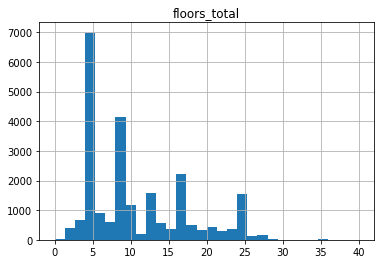

In [39]:
data.hist('floors_total', bins=30, range=(0,40)) # заменяем пропуски медианой

In [40]:
len(data.query('floors_total.isna()')) # считаем количество пропусков

86

In [41]:
data.query('floors_total.isna()').head() # смотрим срез

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_first_day_exposition,category_total_area
186,12,11640000.00,65.20,2018-10-02T00:00:00,2,2.60,nan,30.80,4,NaN,...,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,nan,49.00,2018-10-02,большая
237,4,2438033.00,28.10,2016-11-23T00:00:00,1,2.60,nan,20.75,1,NaN,...,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,251.00,2016-11-23,маленькая
457,4,9788348.00,70.80,2015-08-01T00:00:00,2,2.80,nan,38.40,12,NaN,...,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00,2015-08-01,очень большая
671,4,6051191.00,93.60,2017-04-06T00:00:00,3,2.80,nan,47.10,8,NaN,...,Санкт-Петербург,22041.00,17369.00,0.00,nan,1.00,374.00,123.00,2017-04-06,очень большая
1757,5,3600000.00,39.00,2017-04-22T00:00:00,1,2.60,nan,nan,9,NaN,...,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00,2017-04-22,маленькая


In [42]:
data.groupby('category_total_area')['floors_total'].median() # не наглядная зависимость от площади квартиры

category_total_area
большая          9.00
маленькая       10.00
очень большая    9.00
средняя          9.00
Name: floors_total, dtype: float64

In [43]:
data.corr().head(6) # смотрим значение коррекляции между столбцами данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.00,0.10,0.12,0.10,0.06,0.01,0.10,0.03,-0.03,-0.02,0.10,0.12,0.04,0.00,0.02,-0.01,-0.01,-0.00,-0.03
last_price,0.10,1.00,0.65,0.36,0.37,-0.01,0.57,0.03,-0.03,-0.01,0.52,0.03,0.11,-0.05,0.15,-0.02,0.16,-0.08,0.08
total_area,0.12,0.65,1.00,0.76,0.55,-0.08,0.94,-0.02,-0.07,-0.03,0.61,0.05,0.09,-0.08,0.16,-0.02,0.16,-0.10,0.15
rooms,0.10,0.36,0.76,1.00,0.42,-0.23,0.85,-0.15,-0.15,-0.09,0.27,0.02,0.05,-0.06,0.14,-0.05,0.09,-0.06,0.13
ceiling_height,0.06,0.37,0.55,0.42,1.00,-0.10,0.55,-0.05,0.01,-0.01,0.39,-0.03,0.06,-0.12,0.21,-0.04,0.17,-0.10,0.13
floors_total,0.01,-0.01,-0.08,-0.23,-0.10,1.00,-0.17,0.68,0.07,0.05,0.16,0.19,0.16,0.10,-0.25,0.10,-0.12,0.04,-0.05


Максимальная зависимость (положительная корреляция = 0,68) выявлена между столбцами "Всего этажей" от "Этаж объекта". Поэтому этаж объекта разобьем на категории на основании квартилей.

In [44]:
data['floor'].describe() # смотрим квартили

count   23699.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [45]:
def floor_category(floor): # функция по категоризации этажей на основании квартилей
    if floor <= 2:
        return 'низкий'
    elif 2 < floor <= 4:
        return 'средний'
    elif 4 < floor <= 8:
        return 'высокий'
    else:
        return 'очень высокий'

In [46]:
data['floor_category'] = data['floor'].apply(floor_category) # создаем столбец с категориями этажей (применяем функцию)

In [47]:
median_floors_total = data.groupby('floor_category')['floors_total'].median()
median_floors_total

# вычисляем медиану для общего кол-ва этажей в разрезе категории этажей

floor_category
высокий          9.00
низкий           5.00
очень высокий   17.00
средний          5.00
Name: floors_total, dtype: float64

In [48]:
data.loc[
    (data['floors_total'].isna()) & 
    (
        (data['floor_category'] == 'низкий') |
     (data['floor_category'] == 'средний')
    ),
    'floors_total'
] = median_floors_total[1] # заменяем пропуски в столбце всего этажей медианой по категории

In [49]:
data.loc[
    (data['floors_total'].isna()) & 
    (data['floor_category'] == 'высокий'),
    'floors_total'
] = median_floors_total[0] # заменяем пропуски в столбце всего этажей медианой по категории

In [50]:
data.loc[
    (data['floors_total'].isna()) & 
    (data['floor_category'] == 'очень высокий'),
    'floors_total'
] = median_floors_total[2] # заменяем пропуски в столбце всего этажей медианой по категории

In [51]:
len(data.query('floors_total.isna()')) # проверка изменений

0

In [52]:
len(data.query('floors_total < floor')) # считаем кол-во строк, где всего этажей меньше, чем этаж у объекта

16

In [53]:
data.query('floors_total < floor').head() 
# всего этажей меньше, чем этаж у объекта (после замены на значение медианы по удаленности от центра города)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,correct_first_day_exposition,category_total_area,floor_category
2392,7,5395770.00,53.00,2017-06-29T00:00:00,2,2.60,17.00,29.00,22,NaN,...,43074.00,10820.00,0.00,nan,0.00,nan,48.00,2017-06-29,большая,очень высокий
4848,15,13000000.00,98.00,2017-02-08T00:00:00,3,2.80,17.00,nan,18,NaN,...,37625.00,14153.00,0.00,nan,0.00,nan,29.00,2017-02-08,очень большая,очень высокий
5784,4,4262941.00,59.90,2017-04-02T00:00:00,2,2.60,17.00,31.70,18,NaN,...,22041.00,17369.00,0.00,nan,1.00,374.00,127.00,2017-04-02,большая,очень высокий
6030,3,10900000.00,116.23,2017-05-05T00:00:00,4,2.80,17.00,nan,24,NaN,...,35234.00,14674.00,0.00,nan,1.00,844.00,83.00,2017-05-05,очень большая,очень высокий
7922,3,5426412.00,50.11,2016-06-08T00:00:00,2,2.60,17.00,26.94,24,NaN,...,7050.00,13266.00,1.00,868.00,0.00,nan,14.00,2016-06-08,средняя,очень высокий


In [54]:
data['floors_total'] = data['floors_total'].where(data['floors_total'] > data['floor'], data['floor']) 

# меняем в столбце "всего этажей" значение на этаж объекта, если этаж объекта выше, чем всего этажей

In [55]:
len(data.query('floors_total < floor')) # проверка изменений

0

### Избавляемся от пропусков "Жилая площадь"

In [56]:
len(data.query('living_area.isna()')) # считаем количество проусков в жилой площади

1903

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83b7af6f10>]],
      dtype=object)

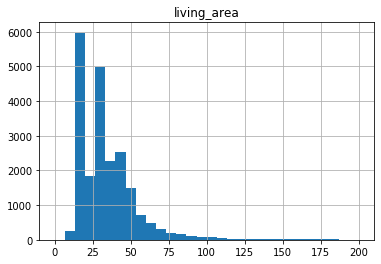

In [57]:
data.hist('living_area', bins=30, range=(0,200))

In [58]:
median_area = data.groupby('category_total_area')['living_area', 'kitchen_area'].median() 
median_area

# вычисляем медиану жилой площади и площади кухни

,living_area,kitchen_area
category_total_area,,
большая,35.50,9.00
маленькая,17.20,8.25
очень большая,51.30,13.00
средняя,27.40,8.00


In [59]:
data.loc[
    (
    (data['living_area'].isna()) & (data['category_total_area'] == 'маленькая')
    ), 'living_area'
] = median_area.loc['маленькая','living_area'] 

# заменяем пропуски в столбце с жилой площадью медианой по категории общей площади 

In [60]:
data.loc[
    (
    (data['living_area'].isna()) & (data['category_total_area'] == 'средняя')
    ), 'living_area'
] = median_area.loc['средняя','living_area'] 

# заменяем пропуски в столбце с жилой площадью медианой по категории общей площади 

In [61]:
data.loc[
    (
    (data['living_area'].isna()) & (data['category_total_area'] == 'большая')
    ), 'living_area'
] = median_area.loc['большая','living_area'] 

# заменяем пропуски в столбце с жилой площадью медианой по категории общей площади 

In [62]:
data.loc[
    (
    (data['living_area'].isna()) & (data['category_total_area'] == 'очень большая')
    ), 'living_area'
] = median_area.loc['очень большая','living_area'] 

# заменяем пропуски в столбце с жилой площадью медианой по категории общей площади 

In [63]:
len(data.query('living_area.isna()')) # проверка изменений

0

### Избавляемся от пропусков "Площадь кухни"

In [64]:
len(data.query('kitchen_area.isna()')) # считаем кол-во пропусков

2278

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83af077f50>]],
      dtype=object)

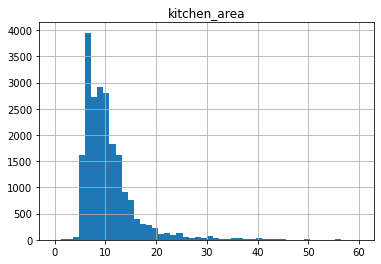

In [65]:
data.hist('kitchen_area', bins=50, range=(0,60))

In [66]:
data.loc[
    (
    (data['kitchen_area'].isna()) & (data['category_total_area'] == 'маленькая')
    ), 'kitchen_area'
] = median_area.loc['маленькая','kitchen_area'] 

# заменяем пропуски в столбце с площадью кухни медианой по категории общей площади 

In [67]:
data.loc[
    (
    (data['kitchen_area'].isna()) & (data['category_total_area'] == 'средняя')
    ), 'kitchen_area'
] = median_area.loc['средняя','kitchen_area']  

# заменяем пропуски в столбце с площадью кухни медианой по категории общей площади 

In [68]:
data.loc[
    (
    (data['kitchen_area'].isna()) & (data['category_total_area'] == 'большая')
    ), 'kitchen_area'
] = median_area.loc['большая','kitchen_area']  

# заменяем пропуски в столбце с площадью кухни медианой по категории общей площади 

In [69]:
data.loc[
    (
    (data['kitchen_area'].isna()) & (data['category_total_area'] == 'очень большая')
    ), 'kitchen_area'
] = median_area.loc['очень большая','kitchen_area'] 

# заменяем пропуски в столбце с площадью кухни медианой по категории общей площади 

In [70]:
len(data.query('kitchen_area.isna()')) # проверка изменений

0

### Избавляемся от пропусков "Аппартаменты"

In [71]:
len(data.query('is_apartment.isna()')) # кол-во пропусков в столбце - "является апартаментом"

20924

In [72]:
data['is_apartment'].isna().mean()

# вычисляем процент пропущенных значений от общего количества записей (очень большой процент, удалить нельзя, потеряем много данных)

0.8829064517490189

In [73]:
data['is_apartment'].value_counts() # количество упоминаний уникальных значений в столбце

False    2725
True       50
Name: is_apartment, dtype: int64

In [74]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False # меняем пропуски на значение - неизвестно

In [75]:
data['is_apartment'].isna().sum() # проверка изменений

0

### Избавляемся от пропусков "Наличие балкона"

In [76]:
len(data.query('balcony.isna()')) # считаем кол-во пропусков в столбце

11519

In [77]:
data['balcony'].value_counts() # кол-во упоминаний уникальных значений

1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

In [78]:
data['balcony'] = data['balcony'].fillna(0)
# data.loc[data['balcony'].isna(),'balcony'] = 0 

# отталкиваемся, если значение не заполнено, значит балкон отсутствует
# заменяем пропуски на значение "0"

In [79]:
len(data.query('balcony.isna()')) # проверка изменений

0

### Избавляемся от пропусков "Название населенного пункта"

In [80]:
len(data.query('locality_name.isna()')) # считаем кол-во пропусков в столбце

49

In [81]:
data['locality_name'].isna().mean() # количество пропусков менее 1% от общего количества

0.002067597788936242

In [82]:
data['locality_name'] = data['locality_name'].fillna('unknown')
# data.loc[data['locality_name'].isna(),'locality_name'] = 'unknown' 

# меняем пропуски на "неизвестно" для сохранения данных

In [83]:
len(data.query('locality_name.isna()')) # проверка изменений

0

In [84]:
data['locality_name'] = data['locality_name'].str.lower()

In [85]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [86]:
count = 0
for name in data['locality_name']:
    if 'ё' in name:  
        count += 1
count

2146

In [87]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [88]:
count = 0
for name in data['locality_name']:
    if 'ё' in name:  
        count += 1
count

0

In [89]:
count = 0
for name in data['locality_name']:
    if ' ' in name:  
        count += 1
count

3941

In [90]:
def change(text):
    return text.strip()


In [91]:
data['locality_name'] = data['locality_name'].apply(change)
data['locality_name']

0            санкт-петербург
1             поселок шушары
2            санкт-петербург
3            санкт-петербург
4            санкт-петербург
                ...         
23694        санкт-петербург
23695                  тосно
23696       село рождествено
23697        санкт-петербург
23698    поселок новый учхоз
Name: locality_name, Length: 23699, dtype: object

### Избавляемся от пропусков в "Количестве парков" и "Расстоянии до ближайшего парка"

In [92]:
len(data.query('parks_around3000.isna()')) # проверяем количество пропусков в "Количестве парков"

5518

In [93]:
len(data.query('parks_nearest.isna()')) # проверяем количество пропусков в "Расстоянии до парка"

15620

In [94]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [95]:
data['parks_nearest'] = data['parks_nearest'].fillna(0)

In [96]:
len(data.query('parks_around3000.isna()')) # проверка изменений

0

In [97]:
len(data.query('parks_nearest.isna()')) # проверка изменений

0

### Избавляемся от пропусков в "Количестве водоемов" и "Расстоянии до ближайшего водоема"

In [98]:
len(data.query('ponds_around3000.isna()')) # количество пропусков в столбце

5518

In [99]:
len(data.query('ponds_nearest.isna()')) # количество пропусков в столбце

14589

In [100]:
len(data.query('ponds_nearest.isna() and ponds_around3000 == 0')) 

# пропущенные значения в "Расстоянии до водоема" и "Количество водоемов" равное 0

9071

In [101]:
data.groupby('ponds_around3000')['ponds_nearest'].median() 

# вычисляем медиану для "Количество водоемов" равное 0 (значения отсуствуют)

ponds_around3000
0.00      nan
1.00   593.00
2.00   437.00
3.00   305.00
Name: ponds_nearest, dtype: float64

Предполагаем, что наличие водоемов зависит от расположения объекта, поэтому заполняем пропущенные значения на медиану в разрезе категории удаленности от центра

In [102]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [103]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

### Избавляемся от пропусков "Сколько дней размещено объявление"

In [104]:
len(data.query('days_exposition.isna()')) # количество пропусков в столбце

3181

In [105]:
data['days_exposition'].isna().mean() # 13% пропущенных значений от общего количества

0.13422507278788134

In [106]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median()) 

# заполняем пропущенные значения медианой

In [107]:
len(data.query('days_exposition.isna()')) # проверка изменений

0

### Изменение типов данных "Всего этажей", "Количество балконов",  Количество парков", "Количество водоемов", "Сколько дней размещено объявление"

In [108]:
data['floors_total'] = data['floors_total'].astype('int')

# общее количество этажей переводим в целое число для удовства расчетов  

In [109]:
data['balcony'] = data['balcony'].astype('int')

# кол-во балконов переводим в целое число для удовства расчетов 

In [110]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

# кол-во парков переводим в целое число для удовства расчетов 

In [111]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

# кол-во водоемов переводим в целое число для удовства расчетов 

In [112]:
data['days_exposition'] = data['days_exposition'].astype('int')

# срок размещения объявления в целых днях переводим в целое число для удовства расчетов 

In [113]:
data.duplicated().sum() # проверяем наличие дубликатов в данных


0

In [114]:
data.info() # проверяем кол-во не нулевых строк в каждом столбце

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
total_images                    23699 non-null int64
last_price                      23699 non-null float64
total_area                      23699 non-null float64
first_day_exposition            23699 non-null object
rooms                           23699 non-null int64
ceiling_height                  23699 non-null float64
floors_total                    23699 non-null int64
living_area                     23699 non-null float64
floor                           23699 non-null int64
is_apartment                    23699 non-null bool
studio                          23699 non-null bool
open_plan                       23699 non-null bool
kitchen_area                    23699 non-null float64
balcony                         23699 non-null int64
locality_name                   23699 non-null object
airports_nearest                23699 non-null float64
cityCenters_nearest             

### Вывод:

1. Изменили формат даты и добавили новый столбец, теперь можно работать с этими данными.
2. Создали категории общей площади по квартилям, по ним рассчитали значение медианы и заменили пустые значения в столбцах (высота потолков, жилая площадь, площадь кухни).
3. Исправили аномальные значения в столбце "высота потолка".
4. Заменили на значение медианы пустые значения в столбцах (расстояние до центра, расстояние до аэропортаб, сколько дней размещено объявление).
5. Создали категорию этажей объектов по квартилям, по ним рассчитали значение медианы и заменили пустые значения в столбце "всего этажей в доме".
6. Заменили пропущенные значения на "неизвестно" в столбцах (является аппартаментом, название населенного пункта).
7. Пустые значения в столбце "наличие балкона" заменили на "0", если поле не заполнено, значит балкон отсутствует.
8. Для удобства осуществления математических операций изменили тип данных на "целое число" в столбцах (всего этажей, количество балконов, количество парков, количество водоемов, сколько дней размещено объявление).

Аномальные значения и отсутствующие данные, вероятнее всего, вызваны опечатками и не указанием параметров объекта (при отсутствии данных, например), то есть вызваны человеческим фактором. Избежать этого возможно при условии обязательного заполнения этих форм в части отсутствия данных и выбора значений из списка в части аномальных данных.

## Расчёты и добавление результатов в таблицу

In [115]:
data['cost_meter'] = data['last_price'] / data['total_area'] # добавляем столбец со значением стоимости квадратного метра

In [116]:
data['weekday_first_exposition'] = data['correct_first_day_exposition'].dt.weekday 

# добавляем столбец с днем недели в дате публикации объявления

In [117]:
data['month_first_exposition'] = data['correct_first_day_exposition'].dt.month 

# добавляем столбец с месяцем в дате публикации объявления

In [118]:
data['year_first_exposition'] = data['correct_first_day_exposition'].dt.year

# добавляем столбец с годом в дате публикации объявления

In [119]:
def check_floor(floor): # функция по определению этажа объекта (первый или другой)
    if floor == 1:
        return 'первый'
    else:
        return 'другой'

In [120]:
data['category_floor'] = data['floor'].apply(check_floor) # добавляем столбец и применяем функцию к этажу объекта

In [121]:
data['category_floor'] = data['category_floor'].where(data['floor'] != data['floors_total'], 'последний')

# добавляем значение "последний" в столбец категории этажа

In [122]:
data['ratio_living_area'] = data['living_area'] / data['total_area'] # соотношение жилой к общей площади

In [123]:
data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area'] # соотношение площади кухни к общей площади

## Исследовательский анализ данных

### Изучаем параметры: площадь, цена, число комнат, высота потолков

In [124]:
our_list = ['last_price', 'total_area', 'rooms', 'ceiling_height']
index = data['cost_meter']

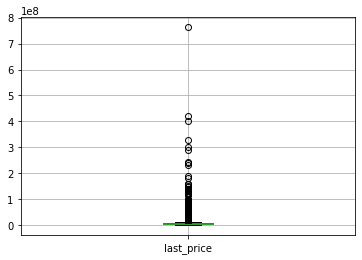

In [125]:
data.pivot_table(index='cost_meter', values='last_price').boxplot()

In [126]:
def study_hist (table): # функция для анализа данных
    for i in range(len(table.columns)):
        column = table.columns[i]
        if column in our_list:
            table.hist(column, bins=50)
            print(table[column].describe())
            print()
            print(table[column].value_counts())
            print()
            # plt.boxplot(table[column])
            # table[column].plot())
            # table.pivot_table(index=index, values=column).boxplot()
            

<div style="border:solid blue 2px; padding: 20px"> 
    
**Комментарий студента**
    
У меня не получилось добавить в функцию *.boxplot()*, так как график объединялся с диаграммой.
Также диаграммы идут после всех значений *.describe()* и *.value_counts()* в цикле, то есть они находятся не рядом и тяжело их сравнивать.
Чтобы диаграммы были информативны (насколько я их понимаю), они же должны иметь разные параметры *range*

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

4500000.00     342
3500000.00     291
4000000.00     260
4300000.00     260
4200000.00     259
              ... 
4412094.00       1
6416000.00       1
4581000.00       1
34551000.00      1
6029433.00       1
Name: last_price, Length: 2978, dtype: int64

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

1     80

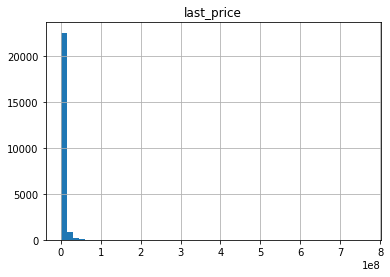

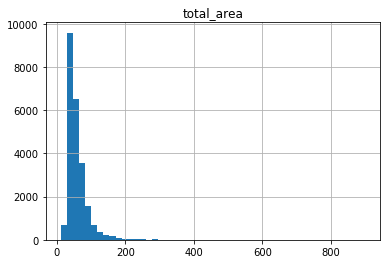

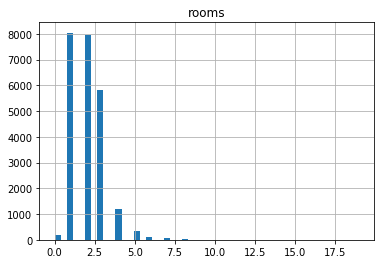

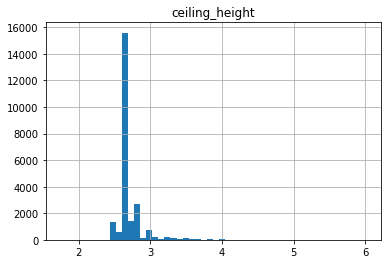

In [141]:
study_hist(data)

In [142]:
data['total_area'].describe() # изучаем общую площадь

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83add444d0>]],
      dtype=object)

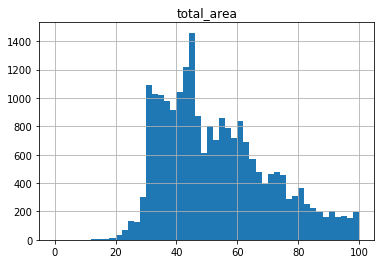

In [143]:
data.hist('total_area', bins=50, range=(0, 100))

# пик приходится на значения 42-45 м2
# с увеличением площади кол-во объектов уменьшается

In [144]:
data['total_area'].value_counts().head() # изучаем цифровые показатели

45.00    419
42.00    383
60.00    347
31.00    346
44.00    345
Name: total_area, dtype: int64

In [145]:
data['last_price'].describe() # изучаем стоимость

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ae7c65d0>]],
      dtype=object)

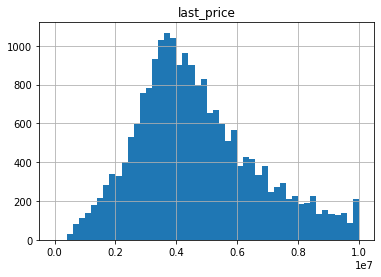

In [146]:
data.hist('last_price',bins=50, range=(0,10000000)) 

# чаще всего объекты стоят в районе 4 млн.

In [147]:
data['rooms'].describe() # изучаем кол-во комнат

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ae0b16d0>]],
      dtype=object)

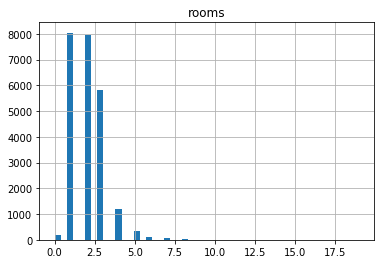

In [148]:
data.hist('rooms',bins=50, range=(0,19))

# 1 и 2-двухкомнатных объектов примерно равное кол-во

In [149]:
data['rooms'].value_counts().head() # проверяем числовые показатели

1    8047
2    7940
3    5814
4    1180
5     326
Name: rooms, dtype: int64

In [150]:
data['ceiling_height'].describe() # изучаем высоту потолков

count   23699.00
mean        2.67
std         0.20
min         1.75
25%         2.60
50%         2.60
75%         2.70
max         6.00
Name: ceiling_height, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ad5be950>]],
      dtype=object)

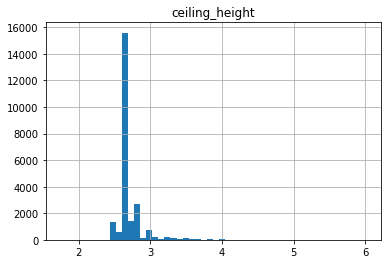

In [151]:
data.hist('ceiling_height',bins=50)

# лидер 2.60 м, это значенние медианы, на которое мы заменили пропуски в этом столбце в кол-ве чуть более 9 тыс.

In [152]:
data['ceiling_height'].value_counts().head() # числовые показатели

2.60    15136
2.80     2572
2.50     1337
2.70      837
3.00      701
Name: ceiling_height, dtype: int64

### Изучаем время продажи квартиры

In [153]:
data['days_exposition'].describe() # описание столбца

count   23699.00
mean      169.36
std       206.54
min         1.00
25%        45.00
50%        95.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ae116350>]],
      dtype=object)

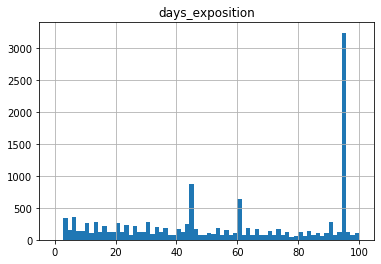

In [154]:
data.hist('days_exposition', bins=70, range=(0, 100))

# с ограничением по оси Х = 100 дней
# имеем 3 пика: 95 дней, 45 дней, 60 дней

In [155]:
data['days_exposition'].value_counts().head() # числовые показатели

95    3245
45     880
60     538
7      234
30     208
Name: days_exposition, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ae17d090>]],
      dtype=object)

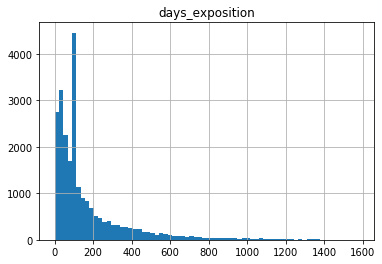

In [156]:
data.hist('days_exposition', bins=70, range=(0, 1580))

# полная гистограмма, свыше 100 дней кол-во объектов уменьшается
# похоже на распределение Пуассона

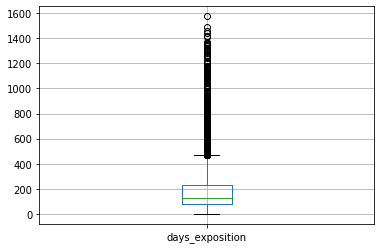

In [157]:
data.pivot_table(index='last_price', values='days_exposition').boxplot()

Нормальные значения по количеству дней продажи квартиры от 0 до 430 дней. Эти значения попали в 1,5 межквартильных размаха. Все, что дольше 430 дней - выбросы, это означает, что продажа квартиры дольше 430 дней необычно долгая.

### Убираем редкие и выбивающиеся значения

In [158]:
data['days_exposition'].describe() # смотрим медиану и среднее

count   23699.00
mean      169.36
std       206.54
min         1.00
25%        45.00
50%        95.00
75%       199.00
max      1580.00
Name: days_exposition, dtype: float64

In [159]:
days_limit = 1400

In [160]:
len(data.query('days_exposition > @days_limit')) / len(data) 

# меньше 1% от общего кол-ва объявлений, объявления с продажей более 1400 дней

0.0008017215916283388

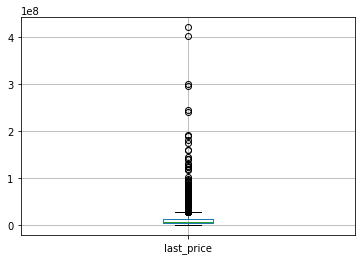

In [161]:
#plt.ylim(0,2)
data.pivot_table(index='total_area',values='last_price').boxplot()

In [162]:
data['last_price'].describe()

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

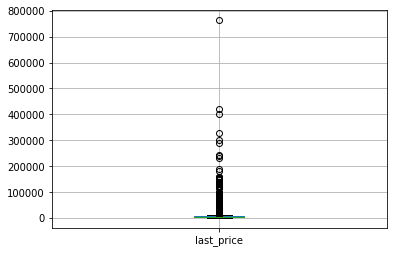

In [163]:
data_price = pd.DataFrame(data=data['last_price'] / 1000, columns=['last_price'])
data_price.boxplot()

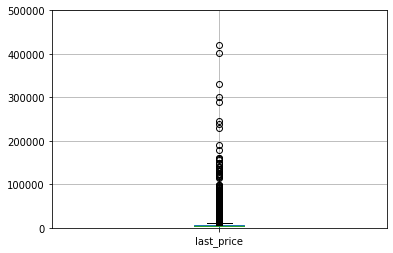

In [164]:
plt.ylim(0,500000)
data_price.boxplot()

In [165]:
price_limit = 30000000 # 

In [166]:
len(data.query('last_price > @price_limit'))

316

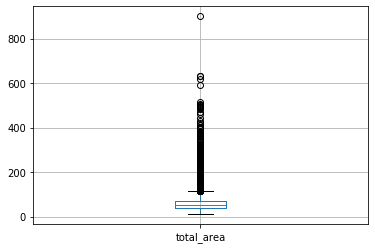

In [167]:
data_area = pd.DataFrame(data=data['total_area'], columns=['total_area'])
data_area.boxplot()

In [168]:
area_limit = 600

In [169]:
len(data.query('total_area > @area_limit'))

4

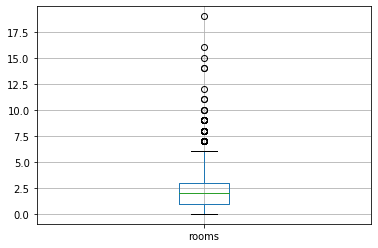

In [170]:
data_rooms = pd.DataFrame(data=data['rooms'], columns=['rooms'])
data_rooms.boxplot()

In [171]:
rooms_limit = 12

In [172]:
len(data.query('rooms > @rooms_limit'))

5

In [173]:
better_data = pd.DataFrame(
    data=data.query('days_exposition < @days_limit'),
    columns=data.columns)
better_data.shape

(23680, 32)

In [174]:
better_data = better_data.drop(better_data[better_data['last_price'] > price_limit].index)

In [175]:
better_data.shape

(23365, 32)

In [176]:
better_data = better_data.drop(better_data[better_data['total_area'] > area_limit].index)

In [177]:
better_data.shape

(23365, 32)

In [178]:
better_data = better_data.drop(better_data[better_data['rooms'] > rooms_limit].index)

In [179]:
better_data.shape

(23362, 32)

In [180]:
len(better_data.query('last_price > @price_limit'))

0

In [181]:
len(better_data.query('total_area > @area_limit'))

0

In [182]:
len(better_data.query('rooms > @rooms_limit'))

0

Создали таблицу *better_data* со значениями без выбросов:
- дней размещения объявления (не более 1400);
- цена (не более 30 млн. руб.);
- общая площадь (не более 600 кв. м.);
- комнат (не более 12).
- с высотой потолка поработали в пункте 2.2

### Изучаем какие факторы влияют на стоимость квартиры

In [183]:
correlation_cost_1 = better_data.loc[:,['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
correlation_cost_1

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.79,0.52,-0.01
total_area,0.79,1.00,0.79,-0.06
rooms,0.52,0.79,1.00,-0.05
cityCenters_nearest,-0.01,-0.06,-0.05,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83aeb3c450>,
      dtype=object)

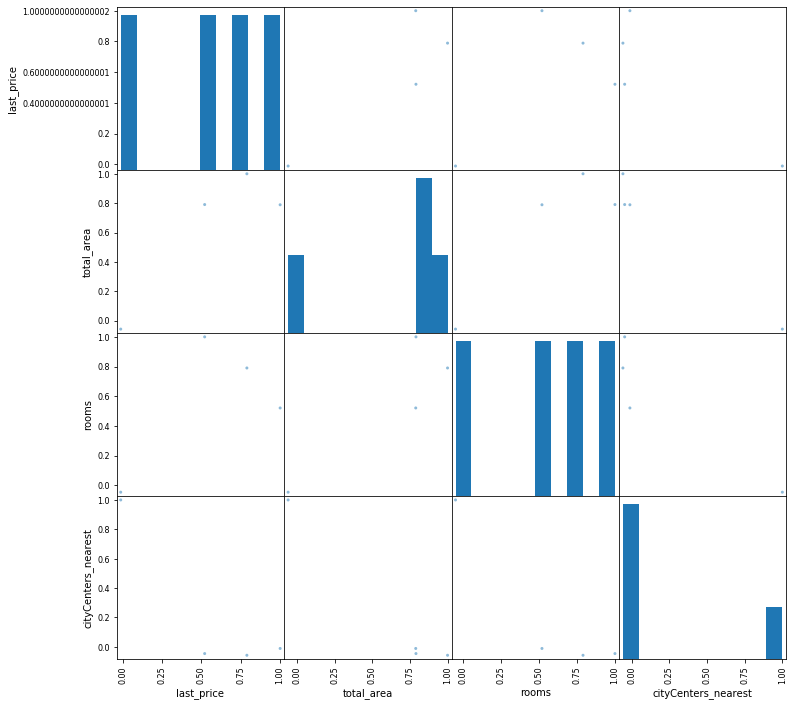

In [184]:
pd.plotting.scatter_matrix(correlation_cost_1,figsize=(12,12)) # построим графики распределения

Из перечисленных выше факторов на цену влиет больше всего общая площадь (Rxy = 0.79). Влияние количества комнат на стоимость оказалось незначительным. А расстояние до центра практически не влият на стоимость объекта (небольшая отрицательная корреляция)

In [185]:
correlation_cost_2 = better_data.pivot_table(index='category_floor', values='cost_meter', aggfunc='mean')
correlation_cost_2

# смотрим среднюю цену за квадратный метр по категории этажа

,cost_meter
category_floor,
другой,100505.12
первый,81166.28
последний,88089.08


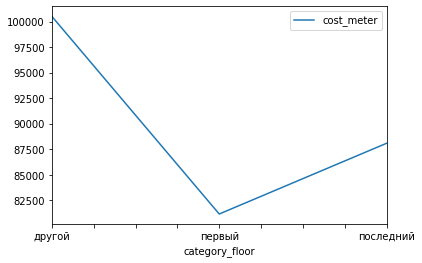

In [186]:
correlation_cost_2.plot()

Этаж влият на стоимость объекта, так средняя стоимость квадратного метра ниже всего у первого этажа, чуть выше - у последнего, самая высокая стоимость на других этажах. Потребители не отдают предпочтения первому и последнему этажам. 

In [187]:
correlation_cost_3 = better_data.loc[:, 
                        ['cost_meter', 'weekday_first_exposition', 'month_first_exposition', 'year_first_exposition']].corr()
correlation_cost_3

,cost_meter,weekday_first_exposition,month_first_exposition,year_first_exposition
cost_meter,1.00,-0.02,-0.00,0.05
weekday_first_exposition,-0.02,1.00,0.01,-0.01
month_first_exposition,-0.00,0.01,1.00,-0.27
year_first_exposition,0.05,-0.01,-0.27,1.00


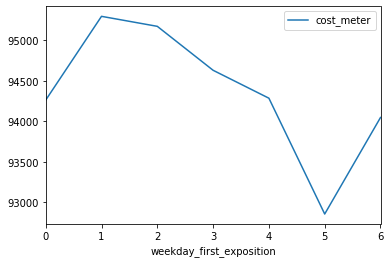

In [188]:
better_data.pivot_table(
    index='weekday_first_exposition', values='cost_meter', aggfunc='median'
).plot(y='cost_meter')

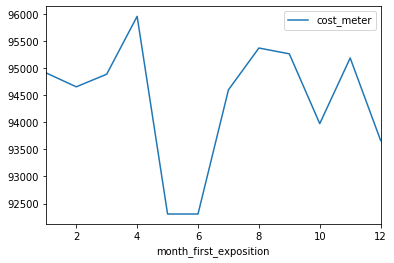

In [189]:
better_data.pivot_table(
    index='month_first_exposition', values='cost_meter', aggfunc='median'
).plot(y='cost_meter')

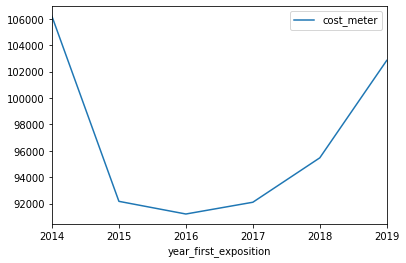

In [190]:
better_data.pivot_table(
    index='year_first_exposition', values='cost_meter', aggfunc='median'
).plot(y='cost_meter')

Зависимости стоимости объекта от даты размещения не выявлено, так как значения нейтрально коррелируют между собой. Стоимость квадратного метра недвижимости росла с 2016 года.

### Изучаем населенные пункты

In [191]:
from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [192]:
try:                                 # подсчет Лемм по названию населенного пункта
    text =[]
    for row in better_data['locality_name']:
        lemmas = m.lemmatize(row)
        text += lemmas
    print(Counter(text))
except:
    print('Не сработало')

Counter({'\n': 23362, 'санкт-петербург': 15394, ' ': 5218, 'поселок': 2659, 'деревня': 944, 'муриный': 590, 'городской': 550, 'кудрово': 472, 'шушары': 440, 'всеволожск': 397, 'пушкин': 365, 'тип': 363, 'колпино': 337, 'парголовый': 326, 'гатчина': 307, 'выборг': 237, 'село': 210, 'петергоф': 201, 'красный': 190, 'новый': 186, 'сестрорецк': 182, 'девяткино': 143, 'сертолово': 142, 'ломоносов': 133, 'кириши': 125, 'бугор': 114, 'сланцы': 112, 'волхов': 111, 'сосновый': 105, 'кингисепп': 104, 'тосно': 104, 'бор': 101, 'кронштадт': 96, 'никольское': 94, '-': 91, 'коммунар': 90, 'кировск': 84, 'отрадный': 80, 'старый': 75, 'янино': 68, '1': 68, 'металлострой': 66, 'приозерск': 66, 'луг': 61, 'шлиссельбург': 57, 'имя': 53, 'тихвин': 49, 'unknown': 49, 'стрельна': 44, 'тельман': 41, 'большой': 40, 'рощино': 39, 'павловск': 37, 'романовка': 37, 'волосово': 36, 'свердлов': 36, 'кузьмоловский': 35, 'мга': 33, 'сиверский': 29, 'ивангород': 28, 'новоселье': 28, 'малый': 28, 'сясьстрой': 24, 'зеле

In [193]:
city_list = pd.DataFrame(
    data=['санкт-петербург', 'муриный', 'кудрово', 'шушар', 'всеволожск', 'пушкин', 'колпино', 'парголовый', 'гатчина', 'выборг'],
    columns=['city'])

In [194]:
city_list

,city
0,санкт-петербург
1,муриный
2,кудрово
3,шушар
4,всеволожск
5,пушкин
6,колпино
7,парголовый
8,гатчина
9,выборг


In [195]:
city_top = better_data['locality_name'].value_counts().head(10)
city_top

# выбираем топ-10 самых часто встречаемых населенных пунктов

санкт-петербург      15394
поселок мурино         556
поселок шушары         440
всеволожск             397
пушкин                 365
колпино                337
поселок парголово      326
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [196]:
def create_lemma(text):
    return m.lemmatize(text)

In [197]:
better_data['lemma'] = better_data['locality_name'].apply(create_lemma)

In [198]:
better_data['lemma'].value_counts()

[санкт-петербург, \n]                                  15394
[поселок,  , муриный, \n]                                556
[поселок,  , шушары, \n]                                 440
[всеволожск, \n]                                         397
[пушкин, \n]                                             365
                                                       ...  
[поселок,  , городской,  , тип,  , кондратьево, \n]        1
[деревня,  , чудской,  , бор, \n]                          1
[деревня,  , курковица, \n]                                1
[деревня,  , хапо, -, ое, \n]                              1
[деревня,  , тихковица, \n]                                1
Name: lemma, Length: 330, dtype: int64

In [199]:
try:
    for name, data in city_list.groupby('city'):
        if name in better_data['lemma']:
            better_data['top_city'] = city_list[name]
except:
    print('не сработало')  # не работает

In [200]:
better_data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,category_total_area,floor_category,cost_meter,weekday_first_exposition,month_first_exposition,year_first_exposition,category_floor,ratio_living_area,ratio_kitchen_area,lemma
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,очень большая,высокий,120370.37,3,3,2019,другой,0.47,0.23,"[санкт-петербург, \n]"
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.60,11,18.60,1,False,...,средняя,низкий,82920.79,1,12,2018,первый,0.46,0.27,"[поселок, , шушары, \n]"


#### Вариант 1

In [187]:
better_data['top_city'] = better_data['locality_name'].where(better_data['locality_name'].isin(city_top.index), False)

In [188]:
better_data.groupby('top_city')['cost_meter'].mean().sort_values(ascending=False)

# группируем по средней цене кв. метра (по убыванию)

top_city
санкт-петербург     110538.40
пушкин              103109.27
деревня кудрово      92473.55
поселок парголово    90103.14
поселок мурино       85681.76
поселок шушары       78677.36
колпино              75333.30
гатчина              68746.15
всеволожск           68670.55
False                60648.43
выборг               58141.91
Name: cost_meter, dtype: float64

### Изучаем квартиры в Санкт-Петербурге

In [189]:
better_data['distance_centre'] = (better_data['cityCenters_nearest'] / 1000).round().astype('int')

# добавляем столбец со значеним км до центра (с округлением до 1 км)

In [190]:
better_data.loc[:,['cityCenters_nearest','distance_centre']].head(3) # проверяем округление

,cityCenters_nearest,distance_centre
0,16028.00,16
1,18603.00,19
2,13933.00,14


In [191]:
saint_city = pd.DataFrame(data=better_data.query('locality_name == "санкт-петербург"'), columns=better_data.columns)
saint_city.shape

# создаем ДатаФрейм только по населенному пункту Санкт-Петербург

(15394, 35)

In [192]:
saint_city['cost_km'] = saint_city['cost_meter'] / saint_city['distance_centre']

# создаем столбец стоимость квадратного метра на км

In [193]:
saint_city['cost_km'] = saint_city['cost_km'].where(saint_city['distance_centre'] != 0,saint_city['cost_meter'])

# где км=0 меняем значения на стоимость кв метра

In [194]:
saint_city.pivot_table(index='distance_centre', values='cost_km').head(15) # смотрим среднюю стоимость кв метра на км 

,cost_km
distance_centre,
0,129095.80
1,144236.17
2,63817.05
3,39001.19
4,31190.99
5,26306.17
6,21758.61
7,18748.39
8,15532.48


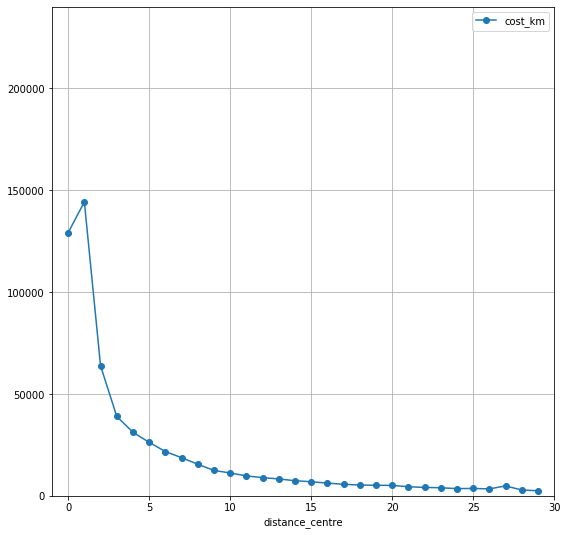

In [195]:
saint_city.pivot_table(index='distance_centre', values='cost_km').plot(
    style='o-',
    xlim=(-1, 30),
    ylim=(0, 240000),
    grid=True,
    legend=True,
    figsize=(9,9)
)

# строим график

Средняя стоимость квадратного метра не сильно изменяется после 9 км от центра. Делаем вывод, что в центр города входит радиус равный 9 км.

In [196]:
city_centre = saint_city.query('distance_centre <= 9')

In [197]:
city_centre.loc[:,['last_price', 'total_area', 'rooms', 'ceiling_height','cityCenters_nearest',]].corr()

# корреляция показателей в центре 

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.00,0.76,0.51,0.42,-0.21
total_area,0.76,1.00,0.80,0.51,-0.24
rooms,0.51,0.80,1.00,0.46,-0.24
ceiling_height,0.42,0.51,0.46,1.00,-0.29
cityCenters_nearest,-0.21,-0.24,-0.24,-0.29,1.00


In [198]:
better_data.loc[:,['last_price', 'total_area', 'rooms', 'ceiling_height','cityCenters_nearest',]].corr()

# корреляция показателей в целом по данным 

,last_price,total_area,rooms,ceiling_height,cityCenters_nearest
last_price,1.00,0.79,0.52,0.53,-0.01
total_area,0.79,1.00,0.79,0.54,-0.06
rooms,0.52,0.79,1.00,0.40,-0.05
ceiling_height,0.53,0.54,0.40,1.00,-0.11
cityCenters_nearest,-0.01,-0.06,-0.05,-0.11,1.00


Существенных различий зависимости цены от остальных значений в выборке в центре Санкт-Петербурга не выявлено, значения корреляций соответствуют общей выборке объектов. В С-П выявлены следующие незначительные показатели:
- чуть большая зависимость цены от высоты потолков;
- отрицательная корреляция между ценой и расстоянием до центра.

In [199]:
city_centre.loc[:, 
                ['cost_meter', 'weekday_first_exposition', 'month_first_exposition', 'year_first_exposition']].corr()

,cost_meter,weekday_first_exposition,month_first_exposition,year_first_exposition
cost_meter,1.00,-0.02,-0.02,0.07
weekday_first_exposition,-0.02,1.00,0.03,-0.01
month_first_exposition,-0.02,0.03,1.00,-0.26
year_first_exposition,0.07,-0.01,-0.26,1.00


In [200]:
correlation_cost_3

,cost_meter,weekday_first_exposition,month_first_exposition,year_first_exposition
cost_meter,1.00,-0.02,-0.00,0.05
weekday_first_exposition,-0.02,1.00,0.01,-0.01
month_first_exposition,-0.00,0.01,1.00,-0.27
year_first_exposition,0.05,-0.01,-0.27,1.00


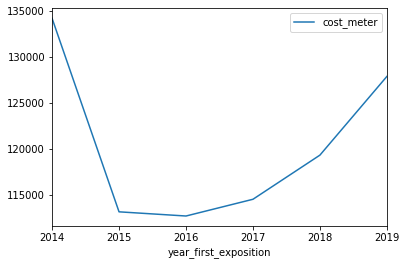

In [201]:
city_centre.pivot_table(
    index='year_first_exposition', values='cost_meter', aggfunc='median').plot()


Дата размещения объявления не вляет на стоимость ни в целом по выборке, ни в центре Санкт-Петербурга. Цена за кв. м. росла с 2016 года как С-П, так и по выборке в целом.

## Общий вывод

1. Получили таблицу с архивом объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
2. В Данных выявлены следующие недостатки:
- пропущенные значения, необходимые для анализац данных;
- некорректный формат даты;
- аномальные значения высоты потолка.

Аномальные значения и отсутствующие данные, вероятнее всего, вызваны опечатками и не указанием параметров объекта, то есть обусловлены человеческим фактором. Избежать этого возможно при условии обязательного заполнения этих форм в части отсутствия данных и выбора значений из списка в части аномальных данных.

3. Проанализированны факторы, влияющие на стоимость объекта недвижимости.
4. Выявлено:
- больше всего цена зависит от площади объекта;
- существует небольшая корреляция цены от количества комнат и высоты потолков;
- зависимость цены от расстояния до центра отсутствует;
- стоимость квадратного метра зависит от этажа (самая низкая стоимость на первом этаже, чуть выше на последнем, на остальных этажах стоимость выше);
- отсутствует зависимость стоимости квадратного метра от даты продажи (дня недели, месяца или года), известно только, что стоимость квадратного метра увеличивалась из года в год с 2016 года;
- исходя из стоимости квадратного метра, к центру Санкт-Петербурга относится радиус в 9 км., свыше этого значения стоимость уменьшается незначительно;
- необычно долгая продажа объекта считается более 430 дней;
- существенной разницы зависимости цены и стоимости квадратного метра от сопоставлямых факторов в центре Санкт-Петербурга и общей выборке объектов также не выявлено.
